# Data Preparation and EDA for IoT23 dataset

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time as timer

In [3]:
#import data
data= pd.read_csv('D:\JupyterNotebook\GitHub\IoT-BotNet-detection-on-IoT23-dataset\IoT23\Data files\iot23_combined_1M.csv', low_memory=False)

In [4]:
data.head()  

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS


In [5]:
#remove unncessary column
del data['Unnamed: 0']

In [6]:
data.tail()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1244671,1.532526e+09,CMeH6R2aua5c5Dd65a,192.168.100.111,41762.0,221.182.209.127,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244672,1.532526e+09,CvqGx33hsXDpDVXa1i,192.168.100.111,58758.0,208.50.139.48,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244673,1.532526e+09,CC83RoUd9RLFuTL81,192.168.100.111,40400.0,40.95.136.51,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244674,1.532526e+09,C4ISld2cuSukEEuQtk,192.168.100.111,27117.0,122.37.183.236,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244675,1.532526e+09,C4U1azYmDx32faVY7,192.168.100.111,23227.0,189.62.234.179,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS


In [7]:
data.shape

(1244676, 21)

# Cleaning Process start! 

In [8]:
df= data.drop(columns=['uid','id.orig_h','id.resp_h','service','history'])

In [9]:
#we drop these values becuase these are unncessary and some of them are completely emply.

In [10]:
df.head()

,ts,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,17576.0,8081.0,tcp,3e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHS
1,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHS
2,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHS
3,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHS
4,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHS


separte the dependent and independent variables

In [11]:
y=df['label']

In [12]:
y.value_counts()

POHS                          677827
Okiru                         262690
Benign                        149744
DDoS                          138777
C&C                            15093
C&C-HeartBeat                    349
Attack                           101
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

In [18]:
#let us drop some labels which are very rare..

In [13]:
X=df

Removing some attack lables as they are very rare .. hence it is better to remove these attacks 

In [41]:
X.drop(X[X['label'] == 'FileDownload' ].index, inplace = True)

In [42]:
X.drop(X[X['label'] == 'C&C-FileDownload' ].index, inplace = True)

In [43]:
X.drop(X[X['label'] == 'Attack' ].index, inplace = True)

In [44]:
X.drop(X[X['label'] == 'C&C-HeartBeat-FileDownload' ].index, inplace = True)

In [45]:
X.drop(X[X['label'] == 'C&C-Mirai' ].index, inplace = True)

In [46]:
X.drop(X[X['label'] == 'C&C-HeartBeat' ].index, inplace = True)

In [47]:
X.drop(X[X['label'] == 'C&C-Torii' ].index, inplace = True)

In [48]:
X.drop(X[X['label'] == 'Okiru-Attack' ].index, inplace = True)

Separating dependent and independent variables

In [49]:
X_=X.iloc[:,:-1]

In [50]:
X_.head()

,ts,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,17576.0,8081.0,tcp,3e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
1,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
2,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
3,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
4,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0


In [51]:
y=X['label']

In [52]:
y.head()

0    POHS
1    POHS
2    POHS
3    POHS
4    POHS
Name: label, dtype: object

In [53]:
y.value_counts()

POHS      677827
Okiru     262690
Benign    149744
DDoS      138777
C&C        15093
Name: label, dtype: int64

In [54]:
#ok so we dropped some labels...

In [55]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244131 entries, 0 to 1244675
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ts             1244131 non-null  float64
 1   id.orig_p      1244131 non-null  float64
 2   id.resp_p      1244131 non-null  float64
 3   proto          1244131 non-null  object 
 4   duration       1244131 non-null  object 
 5   orig_bytes     1244131 non-null  object 
 6   resp_bytes     1244131 non-null  object 
 7   conn_state     1244131 non-null  object 
 8   local_orig     1244131 non-null  object 
 9   local_resp     1244131 non-null  object 
 10  missed_bytes   1244131 non-null  float64
 11  orig_pkts      1244131 non-null  float64
 12  orig_ip_bytes  1244131 non-null  float64
 13  resp_pkts      1244131 non-null  float64
 14  resp_ip_bytes  1244131 non-null  float64
dtypes: float64(8), object(7)
memory usage: 191.9+ MB


In [56]:
X=X_.replace('-',0)

In [57]:
#we need to convert some variables which are float in nature but here they look categorical

In [58]:
X['orig_bytes']=X['orig_bytes'].astype(float)

In [59]:
X['duration']=X['duration'].astype(float)

In [60]:
X['resp_bytes']=X['resp_bytes'].astype(float)

In [61]:
#separate categorical variables
cat_df =X.select_dtypes(include=['object']).copy()

In [44]:
cat_df

,proto,conn_state
0,tcp,S0
1,tcp,S0
2,tcp,S0
3,tcp,S0
4,tcp,S0
...,...,...
2803565,udp,S0
2803566,icmp,OTH
2803567,icmp,OTH
2803568,icmp,OTH


In [87]:
Le=LabelEncoder()

In [88]:
cat_features=cat_df.apply(LabelEncoder().fit_transform)

In [63]:
#let us how many categories each column has
cat_df.nunique()

proto          3
conn_state    12
dtype: int64

In [64]:
cat_df["proto"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [65]:
cat_df["proto"].value_counts()

tcp     1228800
udp       15045
icmp        286
Name: proto, dtype: int64

In [92]:
#most packets are TCP protocol

Normal Packets: 138777
Scanning Attacks:  677827
DDos Attacks:  149744
Okiru:  262690
CnC:  15093


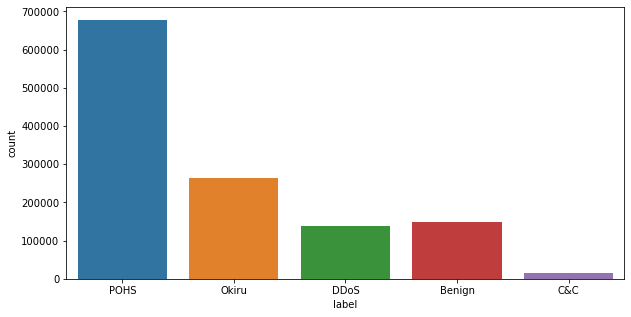

In [67]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=data, x =y)
POHS, Okiru, DDoS, Benign, CnC =y.value_counts()
print("Normal Packets:", Benign)
print("Scanning Attacks: ", POHS)
print("DDos Attacks: ", DDoS)
print("Okiru: ", Okiru)
print("CnC: ", CnC)
plt.show()
#fig.savefig('traffic_distribution.png')

In [94]:
#most of the packets are POHScan 

In [68]:
attacks_data =y.value_counts()

In [69]:
yn=attacks_data

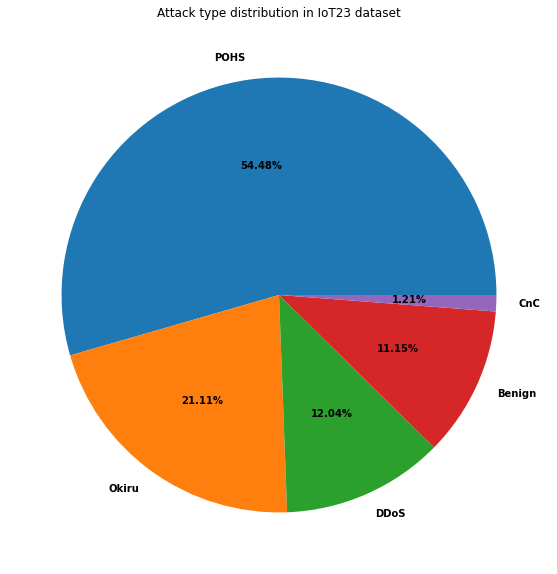

In [96]:
mlabels=['POHS', 'Okiru', 'DDoS', 'Benign', 'CnC']
plt.figure(figsize=(10,10))
explodes=[0,0,0,0,0]
plt.pie(yn, labels = mlabels , explode=explodes, autopct='%.2f%%', textprops={'color':'k', 'fontsize':10, 'weight':'bold'})
plt.title('Attack type distribution in IoT23 dataset')
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\Data Preparation\iot2022_attacks.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [71]:
cat_df["proto"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

TCP packets: 1229345
UDP packets:  15045
ICMP packets:  286


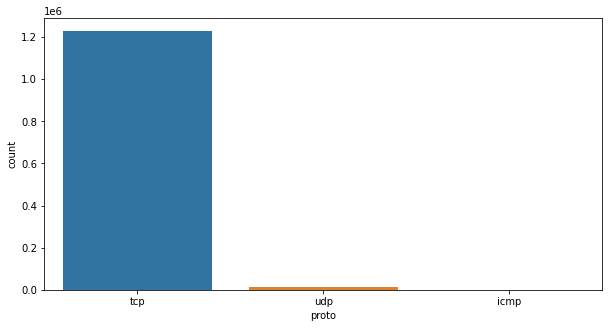

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x ="proto")
tcp, udp, icmp=data["proto"].value_counts()
print("TCP packets:", tcp)
print("UDP packets: ", udp)
print("ICMP packets: ", icmp)
plt.show()

In [73]:
cat_df["conn_state"].unique()

array(['S0', 'REJ', 'RSTO', 'SF', 'OTH', 'S3', 'RSTR', 'S1', 'SH',
       'RSTOS0', 'SHR', 'S2'], dtype=object)

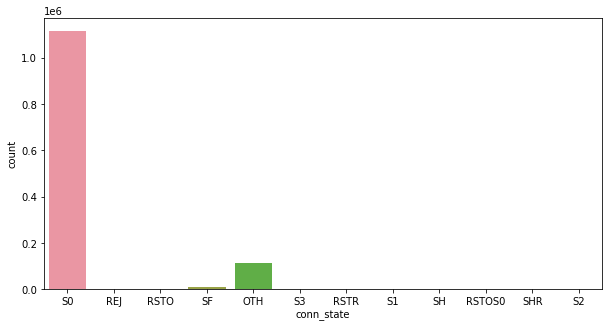

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(data=cat_df, x ="conn_state")
OTH, S0, SHR, RSTRH, SH, RSTOS0, RSTR, RSTO, SF, S1, S3, S2 =data["conn_state"].value_counts()
plt.show()

In [76]:
#separating numerical variables
num_df =X.select_dtypes(exclude=['object']).copy()

In [77]:
num_df.head()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,17576.0,8081.0,0.000003,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
1,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
2,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
3,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
4,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0


ok so there are only three categorical variables...

In [89]:
Xe=pd.concat([num_df,cat_features], axis=1)

In [90]:
Xe.head()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto,conn_state
0,1.536227e+09,17576.0,8081.0,0.000003,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5
1,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5
2,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5
3,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5
4,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5


In [ ]:
#we combine all our data frames together to create a new preporcessed dataset. 

In [91]:
pre_processed_data=pd.concat([Xe,y], axis=1)

In [92]:
pre_processed_data.head()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto,conn_state,label
0,1.536227e+09,17576.0,8081.0,0.000003,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5,POHS
1,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5,POHS
2,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5,POHS
3,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5,POHS
4,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0,1,5,POHS


In [93]:
pre_processed_data.shape

(1244131, 16)

In [ ]:
#let us convert our data into csv

In [94]:
pre_processed_data.to_csv('preprocessed_iot23_1M_samples.csv')

In [ ]:
#now our data is ready for the use..! 